In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

# reads in census data
csv_file_path = "NC_Census_2021/table01.csv"
df = pd.read_csv(csv_file_path)

# column names for age brackets of women
women_15_19_idxs = ["B01001_030E", "B01001_031E"]
women_20_24_idxs = ["B01001_032E", "B01001_033E", "B01001_034E"]
women_25_29_idxs = ["B01001_035E"]
women_30_49_idxs = ["B01001_036E", "B01001_037E", "B01001_038E", "B01001_039E"]

# ratios of women who report ever using emergency contraceptives (EC)
ec_px_15_19 = 0.205
ec_px_20_24 = 0.350
ec_px_25_29 = 0.358
ec_px_30_49 = 0.157

# holds the results
df.insert(0, "vulnerability", 0)

# adds up number of women per age group multiplied by ratio of EC usage
for columns, ratio in zip(
    [women_15_19_idxs, women_20_24_idxs, women_25_29_idxs, women_30_49_idxs], 
    [ec_px_15_19, ec_px_20_24, ec_px_25_29, ec_px_30_49]):
        df["vulnerability"] += df[columns].sum(axis=1) * ratio

# EC risk by county, and total number vulnerable
df["vulnerability"] /= (df["B01001_001E"]) + 1

[0.05598705882352941, 0.05722505121451566, 0.0504671504216513, nan, 0.043780568407138135, nan, 0.059909842519685036, 0.0659325020330713, 0.05363130320890635, nan, 0.06782489055659788, 0.1297977243994943, 0.003041361256544503, nan, 0.05084779273904892, 0.002012820512820513, 0.0907460611677479, 0.03494808126410835, 0.060452991452991454, 0.03785177228786252, nan, 0.03883014434373951, 0.06924328249818446, nan, 0.03687100522951772, nan, 0.040198961937716264, 0.030373417721518983, 0.05692842395044734, nan, nan, 0.03474110835401158, nan, 0.10506579439252337, 0.07227005347593583, 0.052778980799769025, nan, 0.05298259979529171, 0.04884851330203443, 0.09081328125, 0.035007963010531724, nan, 0.10033788784514659, nan, 0.05014397855638523, 0.0618610672560783, 0.039125748502994016, 0.040234331150608045, 0.04273219251336899, 0.060871732522796346, 0.06404716981132075, 0.04521508962067528, 0.07492771684945165, 0.1505777001367158, 0.12250960827790094, 0.05539954853273137, nan, 0.07303622548153384, 0.047

C:\Users\that1\anaconda3\envs\cogweb\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


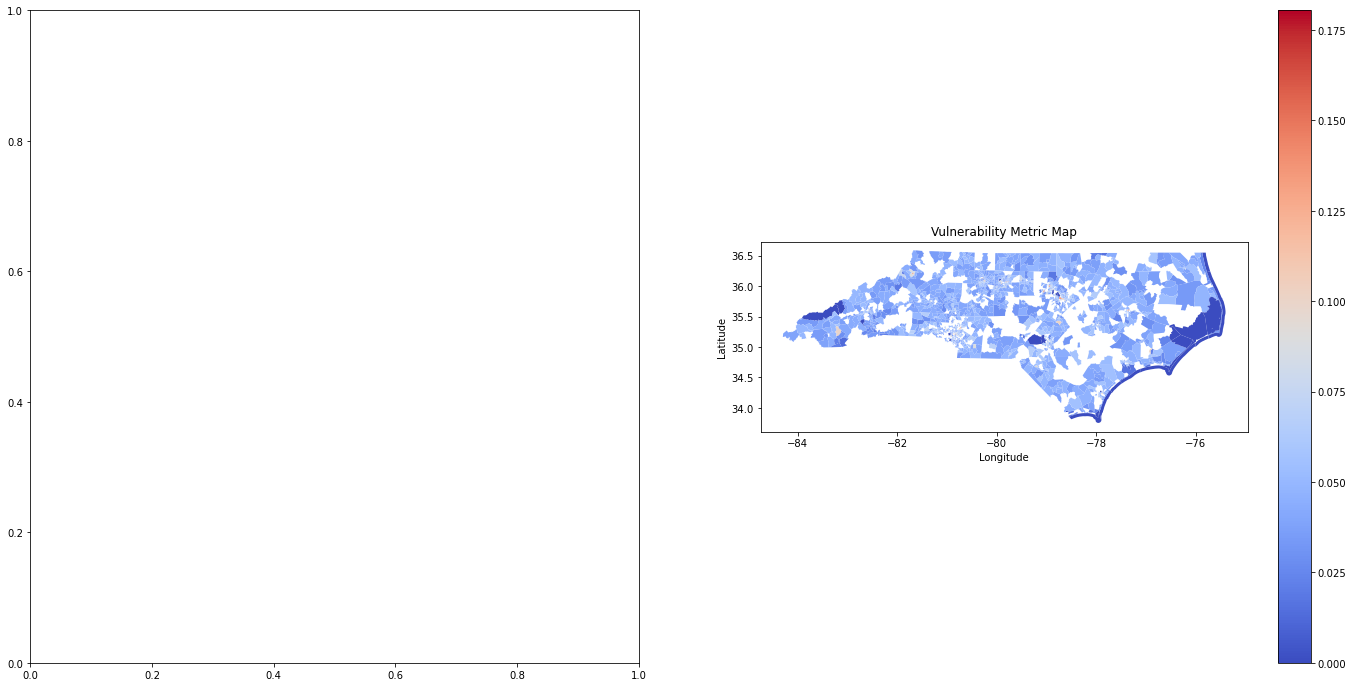

In [55]:
tracts_gdf = gpd.read_file('tl_2019_37_tract.zip')
tracts_gdf = tracts_gdf.to_crs('EPSG:4326')
tracts_gdf["GEOID"] = tracts_gdf["GEOID"].astype(np.int64)

tracts = tracts_gdf.merge(df, on='GEOID', how="outer")

tracts["vulnerability"]
print([i for i in tracts["vulnerability"]])

# Calculate vulnerability metric for each sampled point
for n in [0]:
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))

    """
    # Plot histogram of vulnerability metric
    axs[0].hist(tracts['vulnerability'], bins=100)
    axs[0].set_title(f"Vulnerability Metric Histogram)")
    axs[0].set_xlabel("Vulnerability Metric")
    axs[0].set_ylabel("Frequency")
    """

    # Plot the points on top of the tracts with vulnerability as the color
    tracts.plot(ax=axs[1], column="vulnerability", cmap='coolwarm', legend = True, markersize=1)
    axs[1].set_title(f"Vulnerability Metric Map")
    axs[1].set_xlabel("Longitude")
    axs[1].set_ylabel("Latitude")

    # Save the plots
    fig.savefig(f"pngs/vulnerability_metric_n.png")
    
plt.show()

In [40]:
# Read in census block shape file
gdf_block = gpd.read_file('2010_Census_Block_Groups.zip')
# Change the projection
gdf_block = gdf_block.to_crs('EPSG:32119')

# Keep shapes where the total_pop > 0 OR are left of the -78.6 longitude
blocks = gdf_block[(gdf_block['total_pop'] > 0) | (gdf_block.geometry.centroid.x < -78.6)]

# Import county borders
counties = gpd.read_file('county_boundary.zip')
# Change the projection`
counties = counties.to_crs('EPSG:32119')

print(counties.head())
print(counties.columns)

# Calculate population density of every block
blocks['pop_density'] = (blocks['total_pop'] / blocks['st_areasha']) * 0.00386102

def distance_taper(distance, n):
    return (-2 / (1 + np.exp(-(distance - n))))+ 2

   OBJECTID   County FIPS                                         Rec_Survey  \
0         1   Camden  029  Recorded survey data is available. Visit North...   
1         2    Gates  073                    No recent survey data available   
2         3  Iredell  097  Recorded survey data is available. Visit North...   
3         4   Wilkes  193  Recorded survey data is available. Visit North...   
4         5    Union  179  Recorded survey data is available. Visit North...   

                                            NCGS_url     ck_date  \
0  https://ncem-gis.maps.arcgis.com/apps/OnePane/...  2011-11-29   
1                                               None  2011-11-29   
2  https://ncem-gis.maps.arcgis.com/apps/OnePane/...  2011-11-29   
3  https://ncem-gis.maps.arcgis.com/apps/OnePane/...  2011-11-29   
4  https://ncem-gis.maps.arcgis.com/apps/OnePane/...  2011-11-29   

     Shape__Are     Shape__Len                              GlobalID  \
0  8.650426e+09  680450.731781  900449

C:\Users\that1\anaconda3\envs\cogweb\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Calculating vulnerability metric
0       214.486
1       252.898
2       122.061
3       159.936
4       331.004
         ...   
6150        NaN
6151        NaN
6152        NaN
6153        NaN
6154        NaN
Name: vulnerability, Length: 6117, dtype: float64
successfully assigned vulnerability


C:\Users\that1\anaconda3\envs\cogweb\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


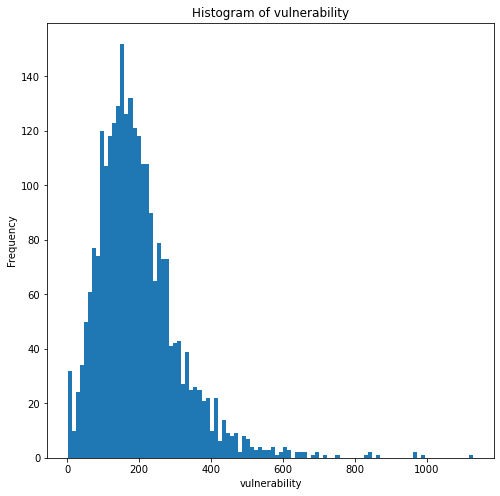

sampled points head


C:\Users\that1\anaconda3\envs\cogweb\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


   objectid       geoid10  total_pop    st_areasha    st_perimet  \
0         1  370319703013       2652  4.009228e+07  31049.119321   
1         2  370319703021        596  5.688639e+06  10099.282064   
2         3  370319705012        840  6.851143e+06  12813.699820   
3         4  370319703022        496  3.428214e+06  10615.794535   
4         5  370319703031        688  8.918802e+06  13056.023550   

                                            geometry   pop_density  \
0  POLYGON ((828067.278 111821.354, 827470.177 11...  2.553964e-07   
1  POLYGON ((825023.178 110795.453, 825026.188 11...  4.045199e-07   
2  POLYGON ((814112.192 113654.333, 814121.387 11...  4.733892e-07   
3  POLYGON ((825017.308 110772.568, 825026.282 11...  5.586192e-07   
4  POLYGON ((822108.420 110307.311, 822437.403 11...  2.978406e-07   

   vulnerability  index_right  OBJECTID    County FIPS  \
0        214.486           32        33  Carteret  031   
1        252.898           32        33  Carteret  031

C:\Users\that1\anaconda3\envs\cogweb\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


right about to show the plot


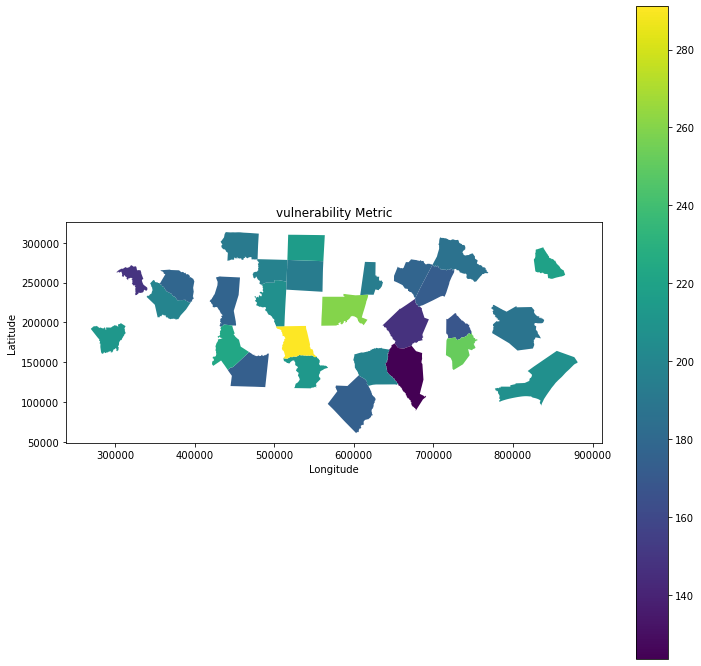

In [18]:
'''
# Create a plot of the sampled points on county borders
fig, ax = plt.subplots(figsize=(12,12))
# Plot the Durham County points in blue
sampled_points_gdf[sampled_points_gdf.geometry.within(counties[counties['County'] == 'Durham'].iloc[0].geometry)].plot(ax=ax, color='blue', markersize=1)

# Add census block borders to the plot with a thinner black color
blocks.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Set the borders of counties.plot to be a thick black
counties.plot(ax=ax, color='none', edgecolor='black', linewidth=2)
# Show the plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Sampled Points in Durham County Borders')
plt.show()
'''

# Calculate vulnerability metric for each sampled point
for _ in range(1):
    print(f"Calculating vulnerability metric")
    blocks['vulnerability'] = df["ec_risk"]
    print(blocks['vulnerability'])
    print('successfully assigned vulnerability')
    
    # Create a histogram of vulnerability
    fig, ax = plt.subplots(figsize=(8,8))
    blocks['vulnerability'].plot.hist(ax=ax, bins=100)
    ax.set(xlabel='vulnerability', ylabel='Frequency', title='Histogram of vulnerability')
    fig.savefig(f"pngs/block_vulnerability_histogram.png")
    plt.show()
    
    print('sampled points head')
    # Perform a spatial join to assign each point to a county
    sampled_points_counties = gpd.sjoin(blocks, counties, op='within')
    print(sampled_points_counties.head())
    # Calculate the mean vulnerability for each county
    vulnerability_by_county = sampled_points_counties.groupby('County')['vulnerability'].mean()

    # Merge the vulnerability data with the county data on the county name or county FIPS code
    county_data = counties.merge(vulnerability_by_county, left_on='County', right_index=True, how="outer")
    
    print(county_data)

    # Create a plot of the vulnerability metric
    fig, ax = plt.subplots(figsize=(12,12))
    county_data.plot(column='vulnerability', ax=ax, legend=True)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"vulnerability Metric")
    # Save the plots
    fig.savefig(f"pngs/ec_vulnerability.png")

    # Perform a spatial join to assign each census block to a county
    census_blocks_counties = gpd.sjoin(blocks, counties, op='within')

    # Group the census blocks by county and sum the population figures to get the total population for each county
    total_pop_by_county = census_blocks_counties.groupby('County')['total_pop'].sum()

    # Join total_pop_by_county to the county_data GeoDataFrame
    county_data = county_data.merge(total_pop_by_county, left_on='County', right_index=True)

    # Calculate the population density for each county
    county_data['pop_density'] = county_data['total_pop'] / county_data['Shape__Are']

    print("right about to show the plot")
    
    plt.show()